# City of Pittsburgh Steps Data

## Metric 
# &#8595;

#### More stairs in a neighborhood means more chances of people slipping and falling there.

### Here, I got the data, printed it, and made the bar graph

Stairs by Neighborhood:

South Side Slopes         109
Mount Washington          54
Perry North               48
Beechview                 42
Greenfield                40
Carrick                   39
Brookline                 38
Elliott                   36
Perry South               35
Sheraden                  35
Beltzhoover               32
Marshall-Shadeland        32
Highland Park             28
Squirrel Hill South       28
Duquesne Heights          24
Allentown                 23
Upper Hill                21
Hazelwood                 21
Spring Hill-City View     20
Polish Hill               20
Overbrook                 19
Fineview                  18
Troy Hill                 18
Lower Lawrenceville       17
Arlington                 15
Garfield                  15
Westwood                  14
Brighton Heights          13
Stanton Heights           13
Spring Garden             13
Upper Lawrenceville       12
Lincoln-Lemington-Belmar  12
Middle Hill               11
South Oakland    

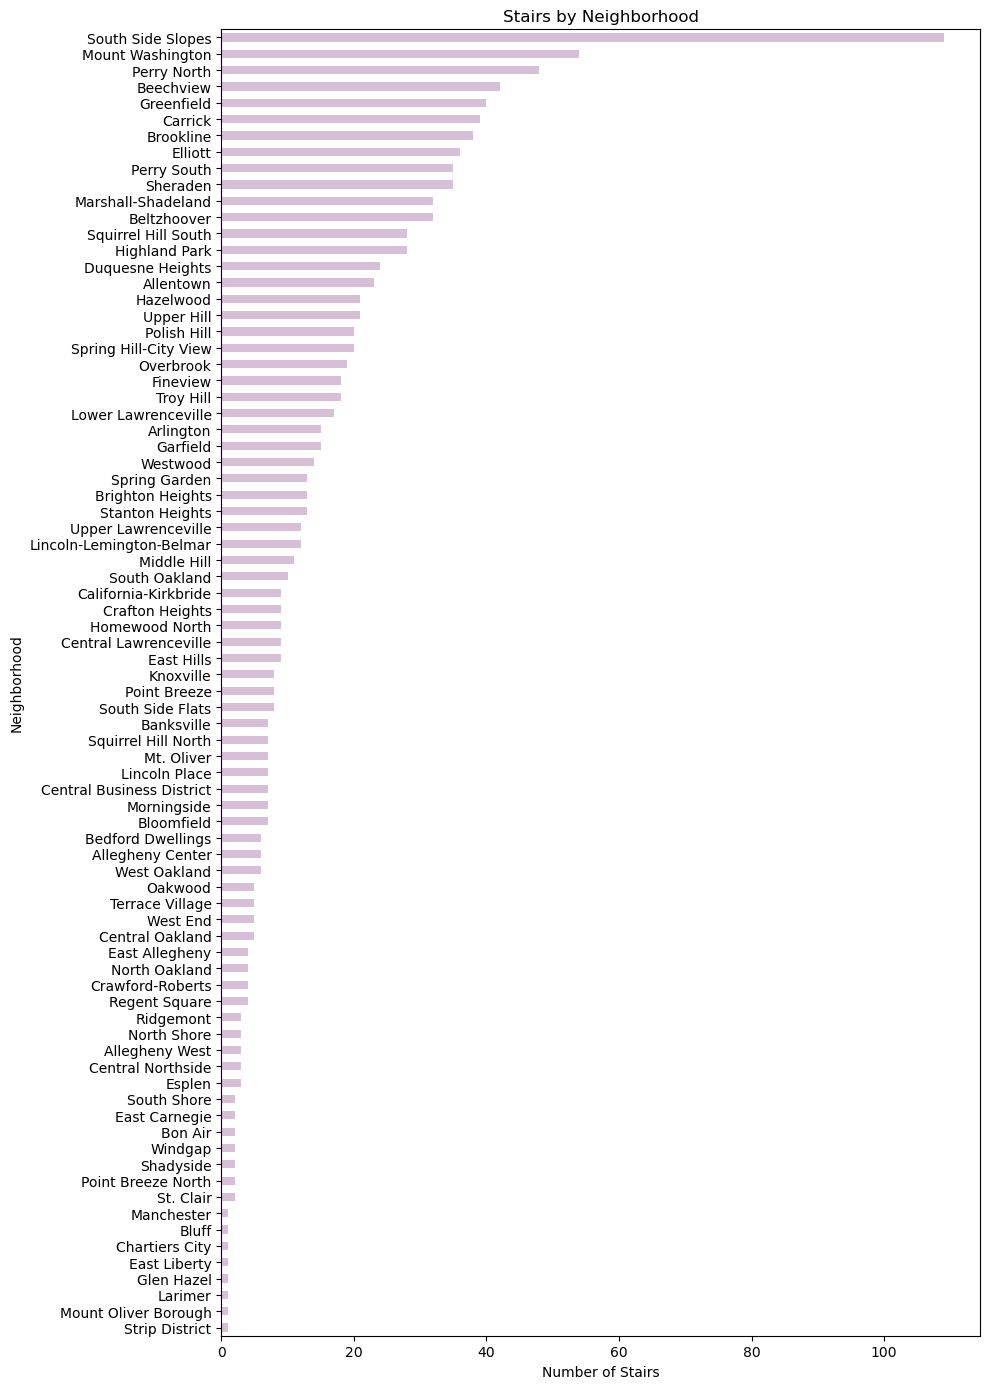

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#import
df = pd.read_csv("stairs.csv")

#counts stairs
stair_counts = df['neighborhood'].value_counts().sort_values(ascending=False)
total_stairs = stair_counts.sum()

#print results
print("Stairs by Neighborhood:\n")
for neighborhood, count in stair_counts.items():
    print(f"{neighborhood:<25} {count}")
print("Total stairs \t\t", total_stairs)

#bar chart (vertical for easy reading)
stair_counts.sort_values().plot(kind='barh', color='thistle', figsize=(10, 14))
plt.title('Stairs by Neighborhood')
plt.xlabel('Number of Stairs')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

## In this part I made the regular map with points and a heatwave map

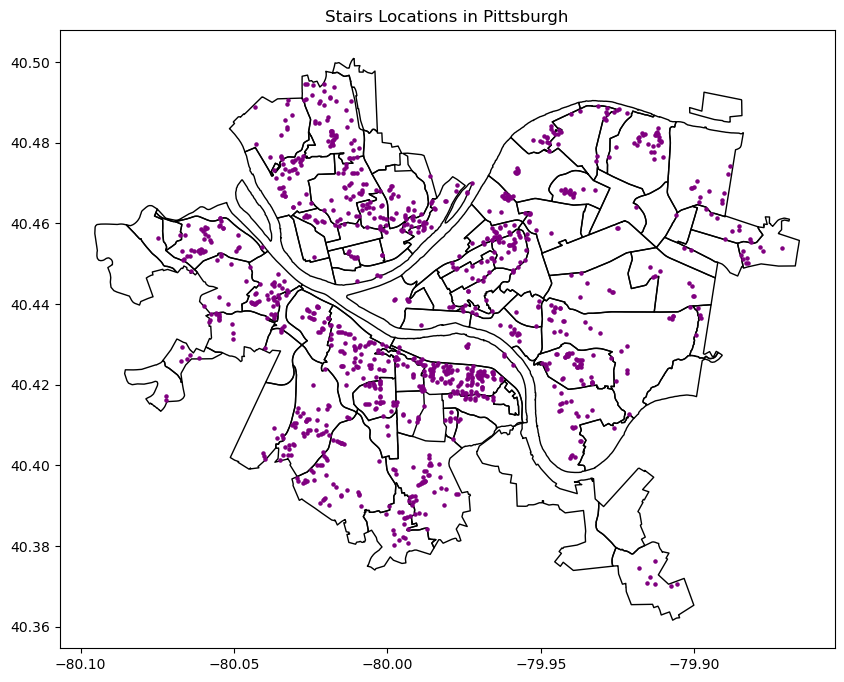

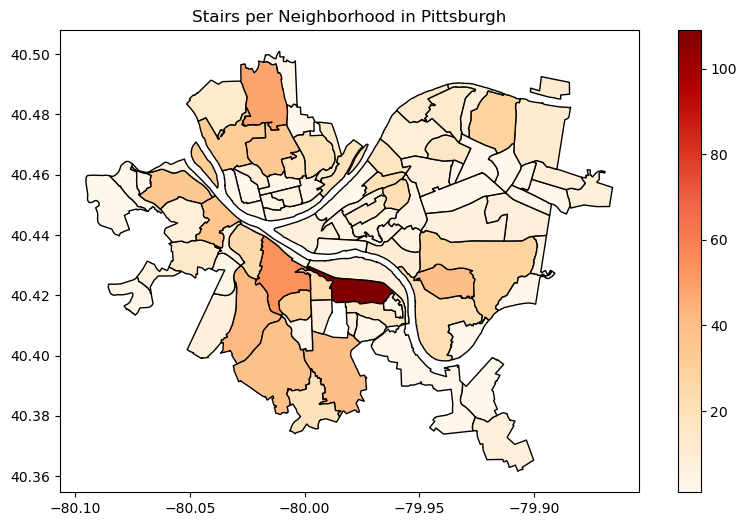

                 hood  stairs_count
15  South Side Slopes           109
22   Mount Washington            54
89        Perry North            48
40          Beechview            42
23         Greenfield            40


In [14]:
#creates geometry points for the stairs locations
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
stairs_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

#load the neighborhood shapefile
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

#stairs data to match the neighborhood crs
stairs_points_aligned = stairs_points.to_crs(neighborhoods.crs)

#plot
ax = neighborhoods.plot(figsize=(10, 10), edgecolor='black', facecolor='none')

#stairs points on top of neighborhoods
stairs_points_aligned.plot(ax=ax, color='purple', markersize=5)

plt.title("Stairs Locations in Pittsburgh")
plt.show()

#perform a spatial join to count how many stairs are in each neighborhood
joined = gpd.sjoin(neighborhoods, stairs_points_aligned, how="left", predicate='contains')

#count the number of stairs in each neighborhood
neighborhood_counts = joined.groupby(joined.index).size()

#add the counts back to the neighborhood
neighborhoods['stairs_count'] = neighborhood_counts
neighborhoods['stairs_count'] = neighborhoods['stairs_count'].fillna(0)

#plot the heatmap using the 'stairs_count' column
ax = neighborhoods.plot(column='stairs_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(10, 6))
ax.set_title("Stairs per Neighborhood in Pittsburgh")
plt.show()

#sort neighborhoods by the number of stairs
top_neighborhoods = neighborhoods.sort_values(by='stairs_count', ascending=False).head(5)

#print the top 5 neighborhoods
print(top_neighborhoods[['hood', 'stairs_count']])


### Conclusion
Southside Slopes has the most stairs compared to the other neighborhoods, making it more likely that a greater number of people have slipped and fallen there.